<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Auquilla Villamagua Maria Jose** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
from Bio import Entrez 
from Bio import SeqIO
import pandas as pd
import re,csv,itertools
import numpy as np


#obtencion de datos (documentos relacionados con la palabra ) 10**5
def download_pubmed(keyword):
    """"La funcion download_pubmed se encarga de rescatar la id de los documentos que esten relacionados con la keyword que se envio en la base de datos de pubmed """
    Entrez.email = 'your.email@example.com'
    handle = Entrez.esearch(db='pubmed',retmax=10**5 ,retmode='xml',term=keyword)
    results = Entrez.read(handle)
    return results

def mining_pubs(tipo):
    """"La función de mining_pubs se encarga de filtrar la data dependiendo de la variable (tipo) que se envió pudiendo ser esta DP AU o AD , los datos  PMID para la extracción de documentos se obtienen gracias a la función download_pubmed que busca los documentos exactos basados en su ID   """
    #--------------------------Uso del metodo download_pubmed---------------------------------------
    results = download_pubmed('Ecuador genomics') #Se usa el metodo download_pubmed para obtener los documentos con una keyword  
    #-----------------------------------------------------------------------------------------------
    
    id_list = results['IdList']                                                  #separamos ids    
    ids = ','.join(id_list)    
    Entrez.email = 'your.email@example.com'
    handle = Entrez.efetch(db='pubmed',rettype='medline',retmode='text',id=ids)  #rescatamos ducumentos por id
    all_data = handle.read()                                                     #se lee la data
    
    if(tipo == "DP"):#PMID y DP_year 
        zipcodes = re.findall(r'PMID-.(.+)', all_data)
        zipcodes1 = re.findall(r'DP  -.(.+)', all_data)
        all_ = list(zip(zipcodes,zipcodes1))
        nom_colum = ['PMID','DP_year']
    else:
        if(tipo == "AU"):#PMID y el num_auth
            zipcodes = re.findall(r'PMID-.(.+)|(AU)  -|', all_data) 
            nom_colum = ['PMID','num_auth']
            
        elif(tipo == "AD"):#country y el num_auth
            zipcodes = re.findall(r'PL  -.(.+)|(AU)  -|', all_data)
            nom_colum = ['country','num_auth']
        mira = list()
        for x in zipcodes:
            if(x[0]!=''):
                mira.append((x[0],''))
            elif(x[1]!=''):
                mira.append(('',x[1]))
        zipcodes= mira       
        lista_1 = list()
        lista_2 = list()
        va_c = 0
        for y in zipcodes:
            if(y[0] !=''):
                x_0 = y[0]
                lista_1.append(y[0])
                if(va_c != 0):
                    lista_2.append(va_c)
                    va_c = 0
            else:
                va_c = va_c+1            
        all_ = list(zip(lista_1,lista_2))
        
    results = pd.DataFrame(all_,columns = nom_colum)             
    return results

#seccion de ejecicion de codigo y envio de variables
#id_list = results['IdList']          #separamos ids 
if __name__ == '__main__':
 #--------------------------Se ingresa la varaible tipo para iniciar---------------------------------------
    #resultado_final = mining_pubs("AU")  #Enviamos el tipo para el procesamiento ER (DP AU AD)  
#---------------------------------------------------------------------------------------------------------
    print("El nombre de la la funcion es:",download_pubmed.__name__ )
    print("Documentacion de la funcion :",download_pubmed.__doc__)
    print("__________________________________")
    print("El nombre de la la funcion es:",mining_pubs.__name__ )
    print("Documentacion de la funcion :",mining_pubs.__doc__)


El nombre de la la funcion es: download_pubmed
Documentacion de la funcion : "La funcion download_pubmed se encarga de rescatar la id de los documentos que esten relacionados con la keyword que se envio en la base de datos de pubmed 
__________________________________
El nombre de la la funcion es: mining_pubs
Documentacion de la funcion : "La función de mining_pubs se encarga de filtrar la data dependiendo de la variable (tipo) que se envió pudiendo ser esta DP AU o AD , los datos  PMID para la extracción de documentos se obtienen gracias a la función download_pubmed que busca los documentos exactos basados en su ID   



## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
# Escriba aquí su código para el ejercicio 2
results = download_pubmed('Ecuador genomics')

#imprime el dataframe
print('El número de artículos es: '+results['RetMax'])
print('El PMID del primer artículo es: '+results['IdList'][0])

El número de artículos es: 193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [4]:
# Escriba aquí su código para el ejercicio 3
pub_year = mining_pubs('DP')
pub_authors = mining_pubs('AU') 
coutries = mining_pubs('AD')

#Presentacion de Tablas   
print('Los primeros dos registros de pub_year son')
display(pub_year.head(2))
print('Los ultimos dos registros de pub_year son')
display(pub_year.tail(2))
print('-------------------------------------------')

print('Los primeros dos registros de pub_authors son')
display(pub_authors.head(2))
print('Los ultimos dos registros de pub_authors son')
display(pub_authors.tail(2))
print('-------------------------------------------')

print('Los primeros dos registros de coutries son')
display(coutries.head(2))
print('Los ultimos dos registros de coutries son')
display(coutries.tail(2))

Los primeros dos registros de pub_year son


,PMID,DP_year
0,35121084,2022 Feb 2
1,35120121,2022 Feb


Los ultimos dos registros de pub_year son


,PMID,DP_year
191,17187350,2007 Jan
192,8661097,1996 Jul 1


-------------------------------------------
Los primeros dos registros de pub_authors son


,PMID,num_auth
0,35121084,12
1,35120121,14


Los ultimos dos registros de pub_authors son


,PMID,num_auth
189,19177531,7
190,19018989,1


-------------------------------------------
Los primeros dos registros de coutries son


,country,num_auth
0,United States,12
1,United States,14


Los ultimos dos registros de coutries son


,country,num_auth
190,England,1
191,United States,9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Desviacion Estandar
13.045912514398267
Media
12.0625


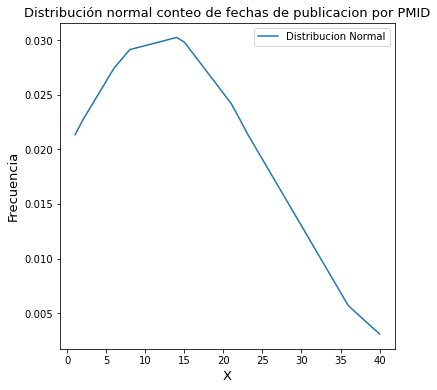

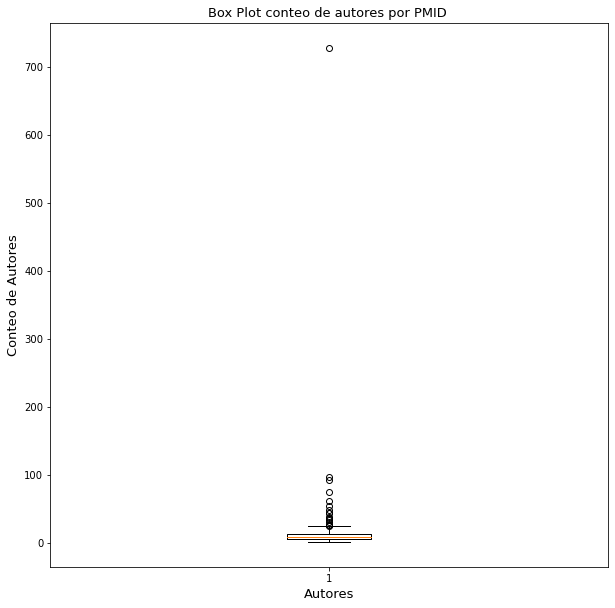

PMID        35121084
num_auth         728
dtype: object


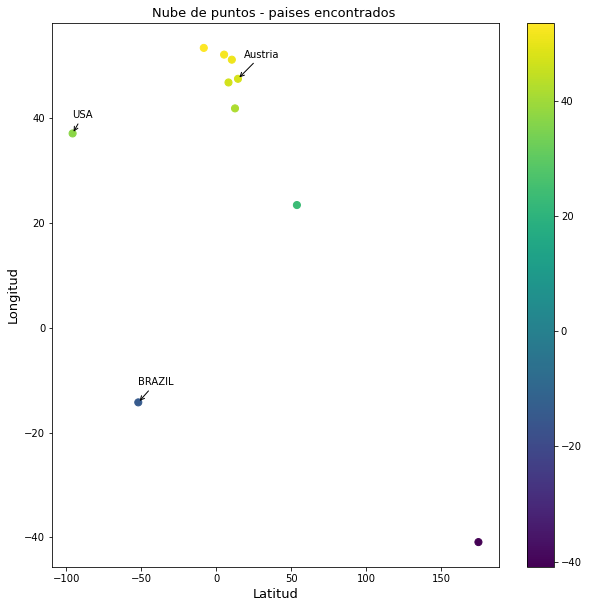

In [7]:
# Escriba aquí su código para el ejercicio 4
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 

pub_year['conteo'] = pd.to_datetime(pub_year['DP_year'], infer_datetime_format=True)
data = pub_year['conteo'].dt.strftime('%Y')
data = pd.DataFrame(data, columns = ['conteo'])
data = pd.DataFrame(data["conteo"].value_counts())
df = pd.DataFrame(data.rename_axis(columns="DP_year"))
#print(df)
#desvicioon estandar 
sd = df.conteo.std()
print('Desviacion Estandar' )
print(sd)
#media
print('Media')
mean = df['conteo'].mean()
print(mean)
#datos
x_axis=list(df['conteo'])

#figura 1
fig, ax = plt.subplots()
x_axis=list(df['conteo'])
plt.title("Distribución normal conteo de fechas de publicacion por PMID",fontsize=13)
line1, = ax.plot(x_axis, norm.pdf(x_axis, mean, sd), label='Distribucion Normal')
plt.xlabel("X",fontsize=13)
plt.ylabel("Frecuencia",fontsize=13)
ax.legend(handles=[line1])
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( 6, 6)

#figura 2
d_cont=list(pub_authors['num_auth'])
fig = plt.figure(figsize =(10, 10)) 
plt.title("Box Plot conteo de autores por PMID ",fontsize=13)
plt.xlabel("Autores",fontsize=13)
plt.ylabel("Conteo de Autores",fontsize=13)
plt.boxplot(d_cont)
plt.show()

autores= pd.DataFrame(data=pub_authors)
print(autores.max())


#figura 3
flat_list = coutries['country'].tolist()
resultantList = [] 
for element in flat_list:
    if element not in resultantList:
        resultantList.append(element)

unique_zipcodes = list(set(resultantList))
unique_zipcodes.sort()

import pandas as pd
data = pd.read_csv('./sample_data/countries.csv', engine='python', skipfooter=3)
data_name = data[data.name.isin(resultantList)]
import matplotlib.pyplot as plt
plt.scatter(data_name.longitude, data_name.latitude, s=50, c=data_name.latitude)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('Austria', xy = (14.550072 , 47.516231), 
               xytext = (18.550072, 51.516231), arrowprops= ard)

plt.title("Nube de puntos - paises encontrados ",fontsize=13)
plt.xlabel("Latitud",fontsize=13)
plt.ylabel("Longitud",fontsize=13)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( 10, 10 )

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

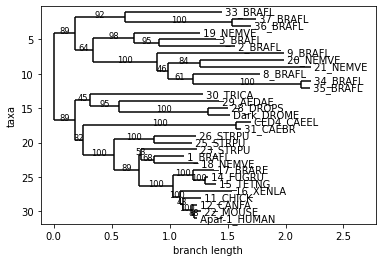

In [13]:
# Escriba aquí su código para el ejercicio 6
from Bio.Phylo import PhyloXML
from Bio import SeqIO
import pylab
from Bio import Phylo

tree = Phylo.read("./sample_data/apaf.xml", "phyloxml")
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```